In [2]:
#from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TURBULENCE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TURBULENCE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TURBULENCE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
data = pd.read_csv("train.tsv",sep="\t")

In [4]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
data.Sentiment.unique()

array([1, 2, 3, 4, 0], dtype=int64)

<AxesSubplot:>

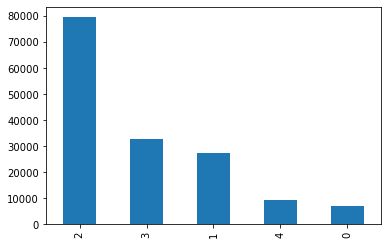

In [6]:
data.Sentiment.value_counts().plot.bar()

In [8]:
data["Sentiment"].replace(0,value = "negative", inplace=True)
data["Sentiment"].replace(1,value = "negative", inplace=True)

In [9]:
data["Sentiment"].replace(3,value = "positive", inplace=True)
data["Sentiment"].replace(4,value = "positive", inplace=True)

In [11]:
data.shape

(156060, 4)

In [12]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,negative
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [13]:
data = data[data["Sentiment"]!=2]

In [14]:
data.shape

(76478, 4)

In [15]:
data.sample(10)

,PhraseId,SentenceId,Phrase,Sentiment
81319,81320,4192,It 's not only dull because we 've seen -LRB- ...,negative
62122,62123,3141,"any of the character dramas , which never reac...",negative
41302,41303,1982,The pace of the film is very slow -LRB- for ob...,negative
76471,76472,3928,make it sting,negative
55097,55098,2747,unbearably dull,negative
58771,58772,2963,gently comic even as the film breaks your heart,positive
125307,125308,6732,laughs at how clever it 's being .,positive
51974,51975,2564,headed down the toilet with the ferocity of a ...,negative
73647,73648,3766,is how so many talented people were convinced ...,negative
146393,146394,7962,unoriginal run,negative


<AxesSubplot:>

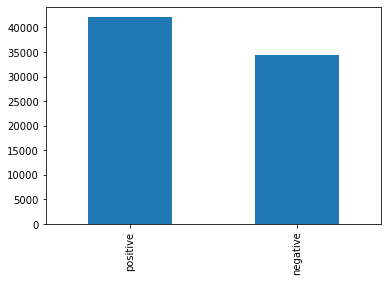

In [16]:
data.Sentiment.value_counts().plot.bar()

In [27]:
df = pd.DataFrame()

df["sentences"] = data["Phrase"]
df["label"]=data["Sentiment"]

In [28]:
df.head()

,sentences,label
0,A series of escapades demonstrating the adage ...,negative
21,good for the goose,positive
22,good,positive
33,"the gander , some of which occasionally amuses...",negative
46,amuses,positive


In [29]:
rare_words = pd.Series(' '.join(df['sentences']).split()).value_counts()[-100:]
df['sentences'] = df['sentences'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))


In [30]:
rare_words

faulted       1
1979          1
Citizen       1
Tiresomely    1
martinet      1
             ..
Juni          1
Riviera       1
Rudy          1
Steinberg     1
Kicks         1
Length: 100, dtype: int64

In [31]:
df.shape

(76478, 2)

In [32]:
df.head()

,sentences,label
0,A series of escapades demonstrating the adage ...,negative
21,good for the goose,positive
22,good,positive
33,"the gander , some of which occasionally amuses...",negative
46,amuses,positive


## TEXT PREPROCESSING

In [33]:
# **Word Tokenization and lowercase**
df["sentences"]=df["sentences"].apply(lambda x: word_tokenize(x.lower()))

#**Remove Punctuation and numbers and chars like "*" and "#"**
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i.isalpha()))

# **Remove Stopwords**
stop_words = stopwords.words('english')
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i not in stop_words))

# **lemmatization**
lem=WordNetLemmatizer()
df["sentences"]=df["sentences"].apply(lambda x: list(lem.lemmatize(i) for i in x))

# join
df["sentences"]=df["sentences"].apply(lambda x: " ".join(x))

In [34]:
df.head()

,sentences,label
0,series escapade demonstrating adage good goose...,negative
21,good goose,positive
22,good,positive
33,gander occasionally amuses none amount much story,negative
46,amuses,positive


In [35]:
df.iloc[0]

sentences    series escapade demonstrating adage good goose...
label                                                 negative
Name: 0, dtype: object

In [ ]:
##TRAIN TEST SPLIT

In [36]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df["sentences"], df["label"], random_state = 1)

In [37]:
X_train.head()

118788    present fascinating glimpse urban life class w...
89514     hey everybody wan na watch movie guy dressed c...
86857                               incredible number story
140626                         ultimately disappoint action
153243                                              unified
Name: sentences, dtype: object

In [38]:
encoder =preprocessing.LabelEncoder()

In [39]:
y_train =encoder.fit_transform(y_train)

In [40]:
y_test =encoder.fit_transform(y_test)

In [41]:
y_train[0:5]

array([1, 0, 1, 0, 1])

In [42]:
y_test[0:5]

array([1, 0, 1, 0, 0])

## COUNT VECTORS

In [43]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [44]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)


In [45]:
vectorizer.get_feature_names()[0:5]

['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon']

In [46]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## TF - IDF

In [48]:
tf_idf_word_vec = TfidfVectorizer()
tf_idf_word_vec.fit(X_train)

TfidfVectorizer()

In [49]:
X_train_tfidf = tf_idf_word_vec.transform(X_train)
X_test_tfidf = tf_idf_word_vec.transform(X_test)

In [50]:
tf_idf_word_vec.get_feature_names()[0:5]

['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon']

In [51]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
a = pd.DataFrame(X_train_tfidf.toarray())

In [53]:
pd.set_option("display.max_columns",1000)

In [54]:
a.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,...,12262,12263,12264,12265,12266,12267,12268,12269,12270,12271,12272,12273,12274,12275,12276,12277,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293,12294,12295,12296,12297,12298,12299,12300,12301,12302,12303,12304,12305,12306,12307,12308,12309,12310,12311,12312,12313,12314,12315,12316,12317,12318,12319,12320,12321,12322,12323,12324,12325,12326,12327,12328,12329,12330,12331,12332,12333,12334,12335,12336,12337,12338,12339,12340,12341,12342,12343,12344,12345,12346,12347,12348,12349,12350,12351,12352,12353,12354,12355,12356,12357,12358,12359,12360,12361,12362,12363,12364,12365,12366,12367,12368,12369,12370,12371,12372,12373,12374,12375,12376,12377,12378,12379,12380,12381,12382,12383,12384,12385,12386,12387,12388,12389,12390,12391,12392,12393,12394,12395,12396,12397,12398,12399,12400,12401,12402,12403,12404,12405,12406,12407,12408,12409,12410,12411,12412,12413,12414,12415,12416,12417,12418,12419,12420,12421,12422,12423,12424,12425,12426,12427,12428,12429,12430,12431,12432,12433,12434,12435,12436,12437,12438,12439,12440,12441,12442,12443,12444,12445,12446,12447,12448,12449,12450,12451,12452,12453,12454,12455,12456,12457,12458,12459,12460,12461,12462,12463,12464,12465,12466,12467,12468,12469,12470,12471,12472,12473,12474,12475,12476,12477,12478,12479,12480,12481,12482,12483,12484,12485,12486,12487,12488,12489,12490,12491,12492,12493,12494,12495,12496,12497,12498,12499,12500,12501,12502,12503,12504,12505,12506,12507,12508,12509,12510,12511,12512,12513,12514,12515,12516,12517,12518,12519,12520,12521,12522,12523,12524,12525,12526,12527,12528,12529,12530,12531,12532,12533,12534,12535,12536,12537,12538,12539,12540,12541,12542,12543,12544,12545,12546,12547,12548,12549,12550,12551,12552,12553,12554,12555,12556,12557,12558,12559,12560,12561,12562,12563,12564,12565,12566,12567,12568,12569,12570,12571,12572,12573,12574,12575,12576,12577,12578,12579,12580,12581,12582,12583,12584,12585,12586,12587,12588,12589,12590,12591,12592,12593,12594,12595,12596,12597,12598,12599,12600,12601,12602,12603,12604,12605,12606,12607,12608,12609,12610,12611,12612

## CLASSIFICATION MODELS

### LOGISTIC REGRESSION

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
# Make predictions
y_pred = log_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[7205 1438]
 [1014 9463]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      8643
           1       0.87      0.90      0.89     10477

    accuracy                           0.87     19120
   macro avg       0.87      0.87      0.87     19120
weighted avg       0.87      0.87      0.87     19120



In [60]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
log_accuracy_count = model_selection.cross_val_score(log_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", log_accuracy_count)

Count Vectors Accuracy: 0.8272489539748953


In [61]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_tfidf, y_train)
log_accuracy_tf = model_selection.cross_val_score(log_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", log_accuracy_tf)

TF-IDF Accuracy: 0.8234832635983264


## XGBoost CLASSIFIER

In [62]:
from xgboost import XGBClassifier

In [64]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)
# Make predictions
y_pred = xgb_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[4157 4486]
 [ 640 9837]]
              precision    recall  f1-score   support

           0       0.87      0.48      0.62      8643
           1       0.69      0.94      0.79     10477

    accuracy                           0.73     19120
   macro avg       0.78      0.71      0.71     19120
weighted avg       0.77      0.73      0.71     19120



In [65]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)
xgb_accuracy_count = model_selection.cross_val_score(xgb_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", xgb_accuracy_count)

Count Vectors Accuracy: 0.7101464435146443


In [66]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_tfidf , y_train)
xgb_accuracy_tf = model_selection.cross_val_score(xgb_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", xgb_accuracy_tf)

TF-IDF Accuracy: 0.7021966527196652


In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_count , y_train)
# Make predictions
y_pred = dsc_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[7161 1482]
 [1062 9415]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      8643
           1       0.86      0.90      0.88     10477

    accuracy                           0.87     19120
   macro avg       0.87      0.86      0.87     19120
weighted avg       0.87      0.87      0.87     19120



In [70]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_count , y_train)
dsc_accuracy_count = model_selection.cross_val_score(dsc_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", dsc_accuracy_count)

Count Vectors Accuracy: 0.7775627615062761


In [71]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_tfidf , y_train)
dsc_accuracy_tf = model_selection.cross_val_score(dsc_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", dsc_accuracy_tf)

TF-IDF Accuracy: 0.7733263598326359


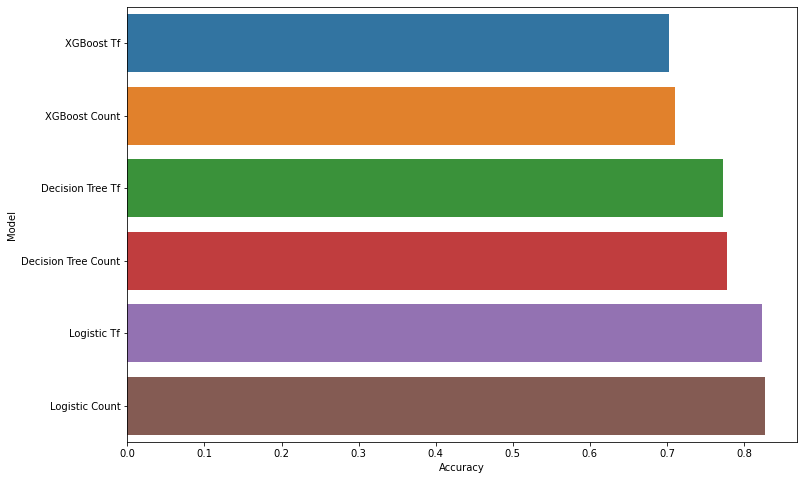

In [72]:
compare = pd.DataFrame({"Model": ["Logistic Count", "Logistic Tf", "XGBoost Count", "XGBoost Tf", "Decision Tree Count","Decision Tree Tf"],
                        "Accuracy": [log_accuracy_count, log_accuracy_tf, xgb_accuracy_count, xgb_accuracy_tf, dsc_accuracy_count,dsc_accuracy_tf]})
compare = compare.sort_values(by="Accuracy", ascending=True)
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Accuracy", y="Model", data=compare)